# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Bernadette Dimitri Regar
- **Email:** bernadetteregar@gmail.com
- **ID Dicoding:** bernadette_regar_40

## Menentukan Pertanyaan Bisnis

- Bagaimana trend penyewaan sepeda di setiap bulan pada masing-masing tahun?
- Berapa kontribusi penyewaan sepada pada setiap season di tahun 2012?
- Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Data Wrangling

### Gathering Data

In [76]:
days_df = pd.read_csv("day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

 Tabel ini berisi 16 kolom. Berikut adalah penjelasan mengenai 16 kolom tersebut:


*   instant: record index
*   dteday : date
*   season : season (1:springer, 2:summer, 3:fall, 4:winter)
*   yr : year (0: 2011, 1:2012)
*   mnth : month ( 1 to 12)
*   holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
*   weekday : day of the week
*   workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
*   weathersit :
  *   1: Clear, Few clouds, Partly cloudy, Partly cloudy
  *   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  *   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  *   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp : Normalized temperature in Celsius. The values are divided to 41 (max)
*   atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
*   hum: Normalized humidity. The values are divided to 100 (max)
*   windspeed: Normalized wind speed. The values are divided to 67 (max)
*   casual: count of casual users
*   registered: count of registered users
*   cnt: count of total rental bikes including both casual and registered








### Assessing Data

In [77]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah melakukan pengecekan ternyata terdapat ketidasesuaian pada kolom dteday bertipe data object yang seharusnya kolom tersebut bertipe data datetime.

In [78]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())
days_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000




*   Tidak terdapat duplikasi data
*   Terdapat kejanggalan pada nilai min kolom hum = 0.



**Insight:**

Setelah melakukan tahapan assesing data, berikut adalah hasil dari penilaian dari seluruh data yang digunakan.

*   Terdapat kesalahan tipe data untuk kolom dteday yang serharusnya bertipe data datetime
*   Terdapat inaccurate value pada kolom hum.
*   Tidak terdapat duplikasi data dan missing value

### Cleaning Data

In [79]:
date_time = pd.to_datetime(days_df['dteday'])
days_df['dteday'] = date_time
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat dari hasil di atas bahwa tipe data kolom dteday berhasil diganti menjadi tipe data datetime.

In [80]:
median_hum = days_df['hum'].median()
print(f"Nilai median dari kolom 'hum': {median_hum}")

days_df['hum'] = days_df['hum'].replace(0, median_hum)
days_df.describe()


Nilai median dari kolom 'hum': 0.626667


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


**Insight:**


*   Nilai min pada kolom hum sudah bukan bernilai 0 lagi. Itu artinya inaccurate valuenya sudah berhasil diganti dengan nilai median dari kolom hum.

*   Tipe data pada kolom dteday sudah berganti menjadi datetime dari tipe data object.






## Exploratory Data Analysis (EDA)

### Explore Data days_df


In [81]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [82]:
daily_rentals = days_df[["mnth", "yr", "cnt", "dteday"]]
daily_rentals.head()

,mnth,yr,cnt,dteday
0,1,0,985,2011-01-01
1,1,0,801,2011-01-02
2,1,0,1349,2011-01-03
3,1,0,1562,2011-01-04
4,1,0,1600,2011-01-05


In [83]:
monthly_data = days_df.groupby(["yr", "mnth"] ).agg({
    "cnt": "sum"
})
monthly_data.head()

cnt
yr mnth        
0  1      38189
   2      48215
   3      64045
   4      94870
   5     135821

Membuat data frame monthly_data untuk melihat jumlah penyewaan sepeda yang terjadi di setiap bulan pada tahun 2011 (0) dann 2012 (1).  

In [84]:
years_sum = days_df.groupby(["yr"] ).agg({
    "cnt": "sum"
})
years_sum.head()

,cnt
yr,
0,1243103
1,2049576


Hasil memperlihatkan jumlah penyewaan sepeda pada tahun 2011 dan 2012. Terlihat bahwa jumlah penyewaan sepeda di tahun 2012 lebih besar dari pada penyewaan di tahun 2011. Selanjutnya adalah menghitung berapa persen peningkatan yang terjadi dari tahun 2011 ke 2012.

In [85]:
yearly_counts = days_df.groupby("yr").agg({
    "cnt": "sum"
}).reset_index()

yearly_counts["previous_year"] = yearly_counts["cnt"].shift(1)
yearly_counts["percentage_change"] = ((yearly_counts["cnt"] - yearly_counts["previous_year"]) / yearly_counts["previous_year"]) * 100
yearly_counts.drop("previous_year", axis=1, inplace=True)

yearly_counts.head()

,yr,cnt,percentage_change
0,0,1243103,NaN
1,1,2049576,64.875799


Jadi, persentasi peningkatan penyewaan sepeda dari tahun 2011 ke tahun 2012 adalah 64.88%.

Berikut adalah exploring data untuk menjawab pertanyaan kedua.

In [86]:
season_sum = days_df[days_df['yr'] == 1].groupby("season").agg({
    "cnt": "sum"

    })

season_sum.head()

,cnt
season,
1,321348
2,571273
3,641479
4,515476


Hasil di atas merupakan jumlah penyewaan setiap season. Kolom season memiliki 4 nilai yaitu 1, 2, 3, 4 yang merepresentasikan setiap musim.
*   1: spring
*   2: summer
*   3: fall
*   4: winter

Season fall memiliki jumlah penyewaan sepeda paling banyak. Lalu pada season spring jumlah penyewaan sepeda paling sedikit.  
Selanjutnya adalah menghitung kontribusi tiap season di tahun 2012 dalam persen.




In [87]:
data_2012 = days_df[days_df["yr"] == 1]

season_2012_sum = data_2012.groupby("season").agg({
    "cnt": "sum"
}).reset_index()

total_2012_rentals = data_2012["cnt"].sum()
season_2012_sum["percentage_contribution"] = (season_2012_sum["cnt"] / total_2012_rentals) * 100
season_contribution = season_2012_sum[["season", "percentage_contribution"]]

season_contribution.head()

,season,percentage_contribution
0,1,15.678755
1,2,27.872741
2,3,31.298132
3,4,25.150373


Selanjutnya akan melakukan exploratory data untuk menganlisis pengaruh kondisi cuaca terhadap penyewaan sepeda.

In [88]:
analysis_weather = days_df.groupby('weathersit').agg({
    'cnt': ['sum']
}).reset_index()

# Mengatur nama kolom
analysis_weather.columns = ['weathersit', 'total_rentals']
analysis_weather.head()

,weathersit,total_rentals
0,1,2257952
1,2,996858
2,3,37869


Kondisi cuaca dibagi menjadi 3 kelompok:
- 1: Cerah
- 2: Berawan/Berkabut
- 3: Hujan/Bersalju

Berdasarkan hasil dataframe analysis_weather terlihat bahwa jumlah penyewaan sepeda tertinggi pada saat kondisi cuaca cerah (1).

In [89]:
days_df.to_csv('days_df.csv', index=False)
daily_rentals.to_csv('daily_rentals.csv', index=False)
monthly_data.to_csv('monthly_data.csv', index=False)
yearly_counts.to_csv('yearly_counts.csv', index=False)
years_sum.to_csv('years_sum.csv', index=False)
season_sum.to_csv('season_sum.csv', index=False)
season_contribution.to_csv('season_contribution.csv', index=False)

**Insight:**
- Jumlah penyewaan sepeda di tahun 2012 lebih banyak dibandingkan penyewaan di tahun 2011.
- Berarti penyewaan sepeda dari tahun 2011 ke tahun 2012 mengalami kenaikan.
- Persentase peningkatan penyewaan sepeda dari 2011 ke tahun 2012 adalah 64.88%
- Jumlah penyewaan sepeda tertinggi di tahun 2012 terdapat di season fall.
- Jumlah penyewaan sepeda terendah di tahun 2012 terdapat di season spring.
- Berikut adalah persentase dari setiap season di tahun 2012.
  *   Season Spring: 15.7%
  *   Season Summer: 27.9%
  *   Season Fall: 31.3%
  *   Season Winter: 25.2%
- Jumlah penyewaan sepeda tertinggi adalah pada saat kondisi cuaca sedang cerah.
- Jumlah penyewaan sepeda terendah adalah pada saat kondisi cuaca sedang hujan.






## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend penyewaan di setiap bulan pada masing-masing tahun?

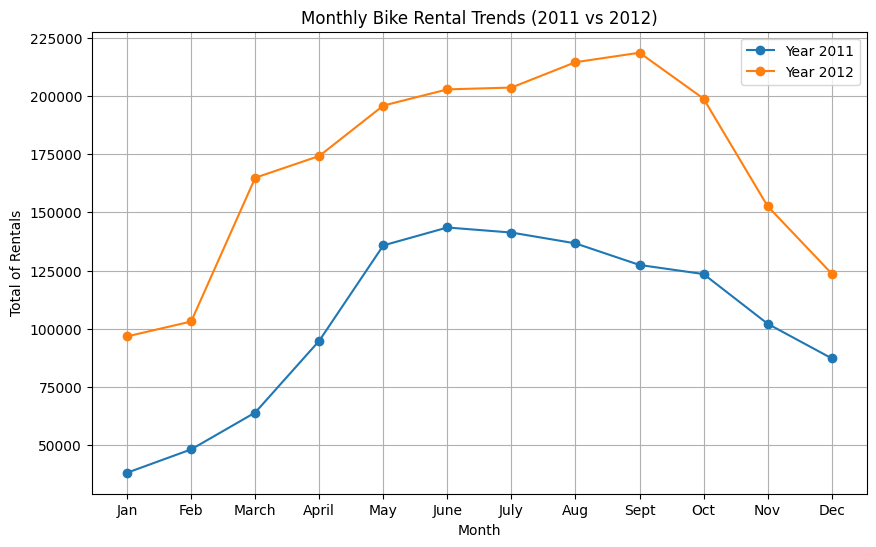

In [90]:
month_names = ["Jan", "Feb", "March", "April", "May", "June",
               "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

fig, ax = plt.subplots(figsize=(10, 6))

# mengelompokkan data dan memplot langsung dari days_df untuk setiap tahun
for yr in days_df['yr'].unique():
    monthly_data = days_df[days_df['yr'] == yr].groupby('mnth')['cnt'].sum()
    ax.plot(monthly_data.index, monthly_data.values, marker='o', label=f'Year {yr + 2011}')

ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)

# label and title
ax.set_title("Monthly Bike Rental Trends (2011 vs 2012)")
ax.set_xlabel("Month")
ax.set_ylabel("Total of Rentals")
ax.legend()

plt.grid()
plt.show()

Untuk menjawab pertanyaan pertama, saya menggunakan line chart agar bisa membandingkan jumlah penyewaan sepeda di tahun 2021 dan 2022. Terlihat dari chart bahwa jumlah penyewaan sepeda setiap bulan di tahun 2011 lebih rendah dibandingkan jumlah penyewaan sepeda di tahun 2012.  


### Pertanyaan 2: Berapa kontribusi penyewaan sepada pada setiap season di tahun 2012?

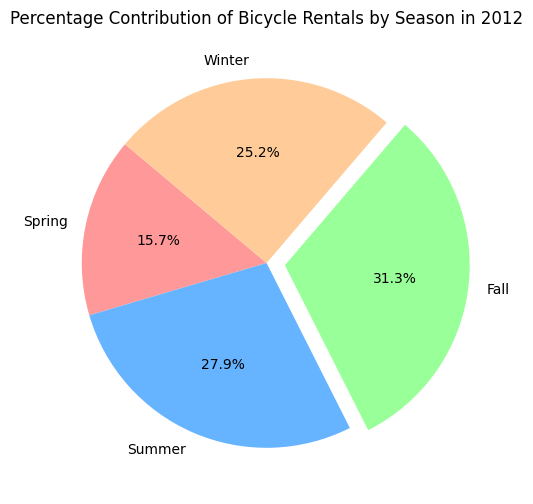

In [91]:
# menghitung total penyewaan di tahun 2012
total_2012 = days_df[days_df['yr'] == 1]['cnt'].sum()

season_contribution_2012 = days_df[days_df['yr'] == 1].groupby("season").agg({"cnt": "sum"})
season_contribution_2012['percentage'] = (season_contribution_2012['cnt'] / total_2012) * 100

# dictionary untuk mengubah season number menjadi nama musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_contribution_2012['season_name'] = season_contribution_2012.index.map(season_labels)

plt.figure(figsize=(8, 6))

labels = season_contribution_2012['season_name']
explode = [0.1 if i == season_contribution_2012['percentage'].idxmax() else 0 for i in season_contribution_2012.index]

# membuat pie chart
plt.pie(
    season_contribution_2012['percentage'],
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title("Percentage Contribution of Bicycle Rentals by Season in 2012")
plt.show()

Untuk menjawab pertanyaan kedua, saya menggunakan piechart. Terlihat dari piechart di atas, bagaimana kontribusi setiap season di tahun 2012. Terlihat bahwa season fall memiliki persentase kontribusi tertinggi di tahun 2012 dengan 31.3%. Lalu season spring memiliki persentase kontribusi terendah di tahun 2012 dengan 15.7%


### Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda?

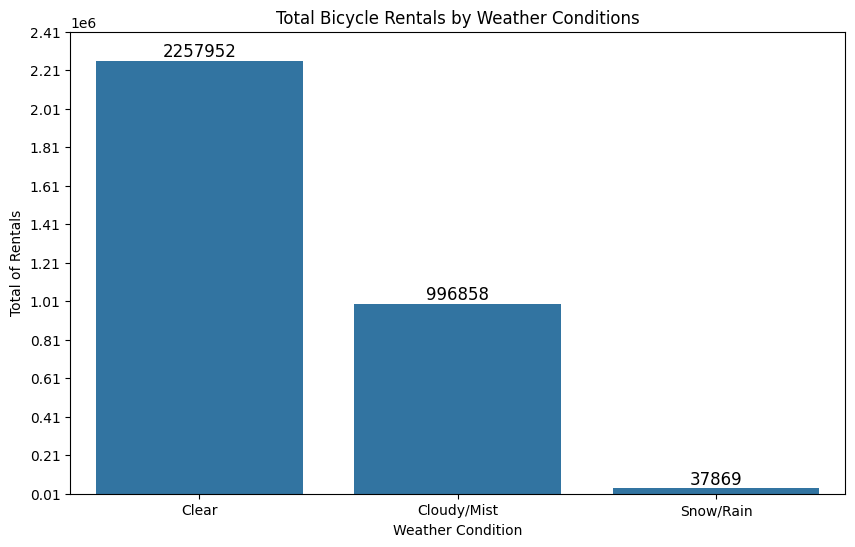

In [92]:
weather_group = days_df.groupby('weathersit').agg({'cnt': 'sum'}).reset_index()

weather_labels = {1: 'Clear', 2: 'Cloudy/Mist', 3: 'Snow/Rain'}
weather_group['weathersit'] = weather_group['weathersit'].map(weather_labels)

# membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group, dodge=False)

plt.title("Total Bicycle Rentals by Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Total of Rentals")

# menampilkan nilai pada setiap bar
for index, value in enumerate(weather_group['cnt']):
    plt.text(index, value + 1000, str(value), ha='center', va='bottom', fontsize=12)

plt.ylim(10000, weather_group['cnt'].max() + 50000)
plt.yticks(range(10000, int(weather_group['cnt'].max()) + 200000, 200000))
plt.show()

Untuk menjawab pertanyaan ketiga saya memvisualisasikan datanya dengan menggunakan bar chart. Terlihat bahwa kondisi cuaca cerah memiliki penyewaan sepeda yang tertinggi. Lalu untuk penyewaan sepeda terendah terjadi di cuaca yang sedang hujan atau bersalju.

**Insight:**
- Jumlah penyewaan sepeda setiap bulan di tahun 2011 lebih rendah dibandingkan jumlah penyewaan sepeda di tahun 2012.
- Jumlah penyewaan tertinggi di tahun 2012 ada di bulan September.
- Jumlah penyewaan tertinggi di tahun 2011 ada di bulan juni.
- Jumlah penyewaan terendah di tahun 2011 dan tahun 2012 ada di bulan januari.
- Jumlah penyewaan sepeda tertinggi terjadi di season fall.
- Jumlah penyewaan sepeda terendah terjadi di season spring.
- Jumlah penyewaan sepeda tertinggi berdasarkan kondisi cuaca adalah saat cuaca sedang cerah.
- Jumlah penyewa sepeda terenda berdasarkan kondisi cuaca adalah saat cuaca sedang hujan atau bersalju

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:

Bulan Juni menjadi bulan dengan penyewaan sepeda tertinggi di tahun 2011. Bulan Jan menjadi bulan dengan penyewaan sepeda terendah di tahun 2011. Bulan September menjadi bulan dengan penyewaan sepeda tertinggi di tahun 2012. Bulan Januari menjadi bulan dengan penyewaan sepeda terendah di tahun 2012. Apabila melihat grafiknya, terlihat bahwa total penyewaan sepeda di tahun 2012 lebih banyak dari pada tahun 2011. Maka dapat disimpulkan bahwa terdapat peningkatan pada penyewaan sepeda dari tahun 2011 ke tahun 2012. Persentase peningkatan yang terjadi dari tahun 2011 ke tahun 2012 adalah 64.88%



- Conclution pertanyaan 2:

Berikut adalah persentasi kontribusi penyewaan sepeda untuk setiap musim di tahun 2012.
1. Spring: 15.7%
2. Summer: 27.9%
3. Fall: 31.3%
4. Winter: 25.2%

Berdasarkan data berikut, terlihat bahwa pada musim fall tahun 2012 memiliki kontribusi tertinggi dalam penyewaan epeda dibandingkan dengan musim-musim lainnya.

- Conclution pertanyaan 3:

Kondisi cuaca lumayan berpengaruh terhadap penyewaan sepeda. Berdasarkan data, terlihat bahwa jumlah penyewaan tertinggi pada saat kondisi cuaca sedang cerah. Lalu jumlah penyewaan terendah itu pada saat kondisi cuaca sedang hujan/bersalju. Jadi kondisi cuaca akan mempengaruhi penyewaan sepeda.